## Lead Scoring Case Study
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.


The company requires to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

 

Data
Dataset has been provided with a leads from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as  null value.
nings that you gathered.one.

### Step 1: Importing and Merging Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the numpy and pandas libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("display.max_rows",None)        # used to display all the rows
pd.set_option("display.max_columns",None)     # used to display all the columns

In [3]:
# Importing all datasets
lead_data = pd.read_csv("Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2: Inspecting the Dataframe

In [4]:
# Let's check the dimensions of the dataframe
lead_data.shape

(9240, 37)

In [5]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Replacing 'Select' with NaN in the specified columns as it is as good as null value

varlist_select =  ['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']

lead_data[varlist_select] = lead_data[varlist_select].replace('Select', np.nan)

In [7]:
# Checking the columns with percentage of null values in descending order

round(100*(lead_data.isnull().sum()/len(lead_data.index)),2).sort_values(ascending=False).head(15)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
dtype: float64

In [8]:
 # Dropping the columns as % of missing values are more than 40%
lead_data = lead_data.drop(['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Asymmetrique Profile Score',
                            'Asymmetrique Activity Score', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index'], axis = 1)

In [9]:
# Dropping the columns as these are not helpful for model building
lead_data = lead_data.drop(['Prospect ID', 'Lead Number', 'Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                            'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis = 1)

In [10]:
lead_data = lead_data.drop(['Search', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations'], axis = 1)

In [11]:
lead_data = lead_data.drop(['Country', 'What matters most to you in choosing a course'], axis = 1)

In [12]:
lead_data['Do Not Call'].value_counts()

Do Not Call
No     9238
Yes       2
Name: count, dtype: int64

In [13]:
lead_data = lead_data.drop(['Do Not Call','Specialization', 'Tags'], axis = 1)

lead_data = lead_data.drop(['What is your current occupation','Newspaper Article', 'City'], axis = 1)

In [14]:
lead_data.shape

(9240, 10)

In [15]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9137 non-null   object 
 8   A free copy of Mastering The Interview  9240 non-null   object 
 9   Last Notable Activity                   9240 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 722.0+ KB


In [16]:
# replacing the null values with the mode
lead_data['Lead Source'].fillna(lead_data['Lead Source'].mode()[0], inplace = True)
lead_data['Last Activity'].fillna(lead_data['Last Activity'].mode()[0], inplace = True)

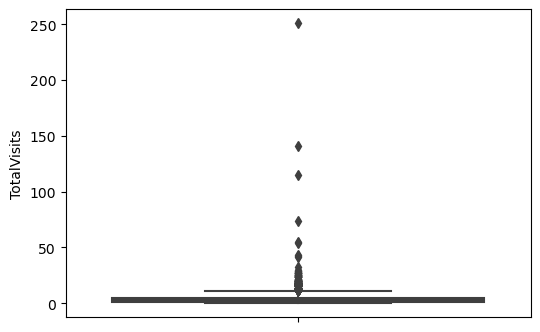

In [17]:
# Plotting box plot for Totalvisits and Page Views per visit

plt.figure(figsize = (6,4))
sns.boxplot(y=lead_data['TotalVisits'])
plt.show()

In [18]:
lead_data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

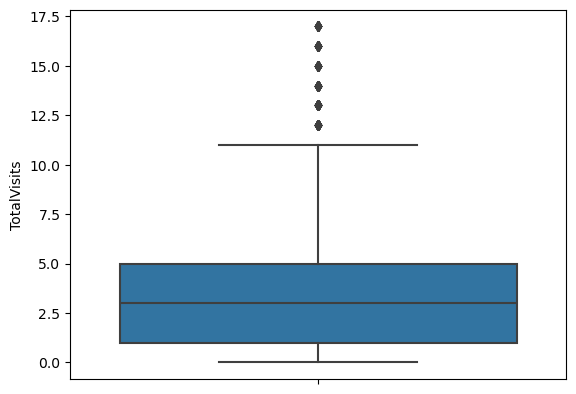

In [19]:
# Removing the outliers

Q3 = lead_data.TotalVisits.quantile(0.99)
lead_data = lead_data[(lead_data.TotalVisits <= Q3)]
sns.boxplot(y=lead_data['TotalVisits'])
plt.show()

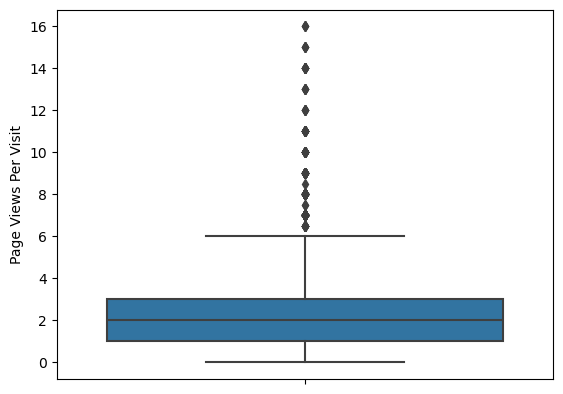

In [20]:
sns.boxplot(y=lead_data['Page Views Per Visit'])
plt.show()

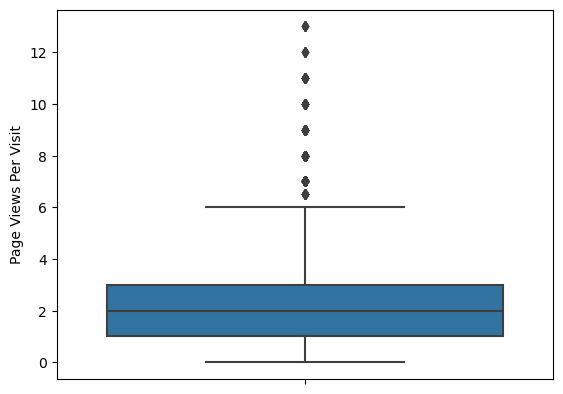

In [21]:
# Removing the outliers

Q3 = lead_data.TotalVisits.quantile(0.99)
lead_data = lead_data[(lead_data.TotalVisits <= Q3)]
sns.boxplot(y=lead_data['Page Views Per Visit'])
plt.show()

In [22]:
# Replacing null values with median values

lead_data['TotalVisits'].fillna(lead_data['TotalVisits'].median(), inplace=True)
lead_data['Page Views Per Visit'].fillna(lead_data['Page Views Per Visit'].median(), inplace=True)

In [23]:
round(100*(lead_data.isnull().sum()/len(lead_data.index)),2).sort_values(ascending=False)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [25]:
final = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted', 'TotalVisits', 'Total Time Spent on Website',
         'Page Views Per Visit', 'Last Activity', 'A free copy of Mastering The Interview','Last Notable Activity']

In [26]:
for col in final:
    print(lead_data[col].value_counts().head(10))
    print("\n")

Lead Origin
Landing Page Submission    4749
API                        3544
Lead Add Form               605
Lead Import                  31
Name: count, dtype: int64


Lead Source
Google              2860
Direct Traffic      2478
Olark Chat          1748
Organic Search      1095
Reference            441
Welingak Website     129
Referral Sites       120
Facebook              31
bing                   6
google                 5
Name: count, dtype: int64


Do Not Email
No     8231
Yes     698
Name: count, dtype: int64


Converted
0    5544
1    3385
Name: count, dtype: int64


TotalVisits
0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: count, dtype: int64


Total Time Spent on Website
0      2193
60       19
127      18
62       17
234      17
75       17
87       17
32       16
157      16
74       16
Name: count, dtype: int64


Page Views Per Visit
0.0    2189
2.0    1789
3.0    1190
4.0     890
1.0     651
5.

#### Converting some binary variables (Yes/No) to 0/1

In [27]:
# List of variables to map

varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead_data[varlist] = lead_data[varlist].apply(binary_map)

In [28]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,0,Modified


In [29]:
lead_data.describe()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
count,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000
mean,0.078172,0.379102,3.084892,476.246612,2.303194,0.311905
std,0.268457,0.485191,2.746080,543.335243,1.993860,0.463297
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,4.000000,1.000000,0.000000
50%,0.000000,0.000000,3.000000,239.000000,2.000000,0.000000
75%,0.000000,1.000000,5.000000,905.000000,3.000000,1.000000
max,1.000000,1.000000,13.000000,2272.000000,13.000000,1.000000


In [30]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8929 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8929 non-null   object 
 1   Lead Source                             8929 non-null   object 
 2   Do Not Email                            8929 non-null   int64  
 3   Converted                               8929 non-null   int64  
 4   TotalVisits                             8929 non-null   float64
 5   Total Time Spent on Website             8929 non-null   int64  
 6   Page Views Per Visit                    8929 non-null   float64
 7   Last Activity                           8929 non-null   object 
 8   A free copy of Mastering The Interview  8929 non-null   int64  
 9   Last Notable Activity                   8929 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 767.3+ KB


## Analysis

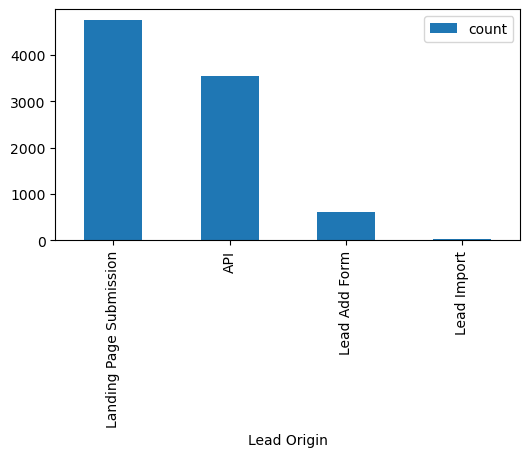

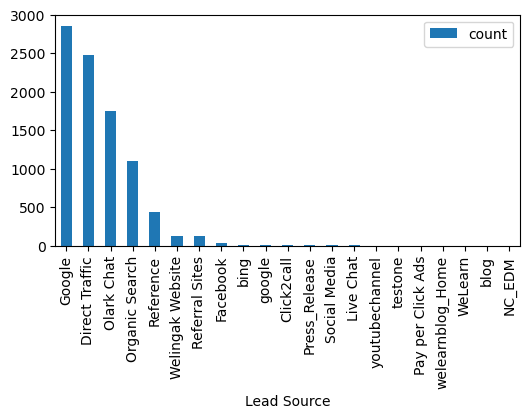

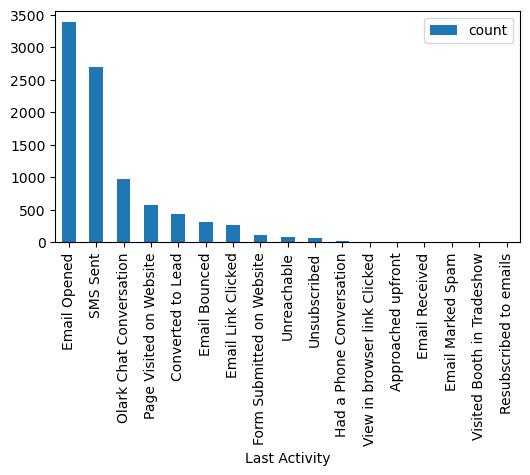

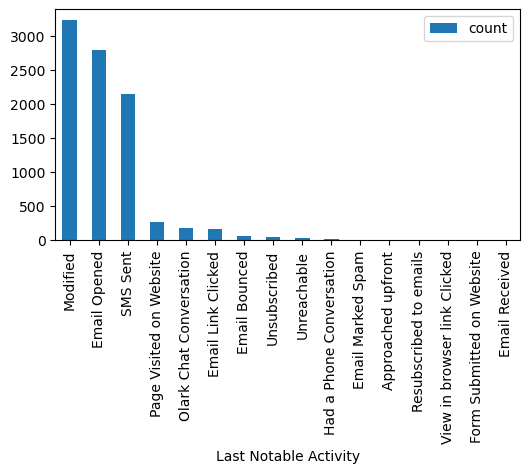

In [31]:
# univariate Analysis on Categorical Application data
cat_col = ['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity']

for i in cat_col:
    plt.figure(figsize= (6,3))
    lead_data[i].value_counts().plot.bar()
    plt.legend()
    plt.show()

In [ ]:
# Based on above charts, we can conclude that few data is not useful/revelent. Hence for analysis all data is not required

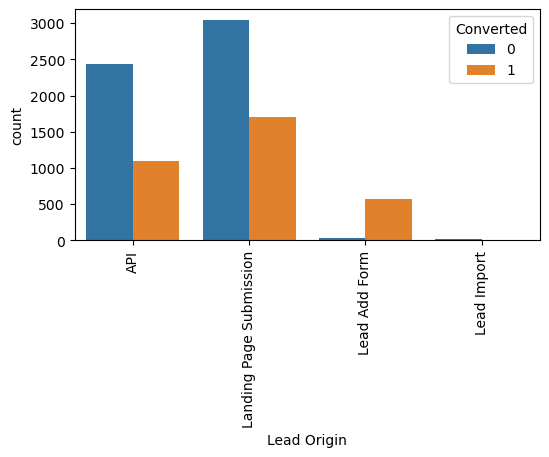

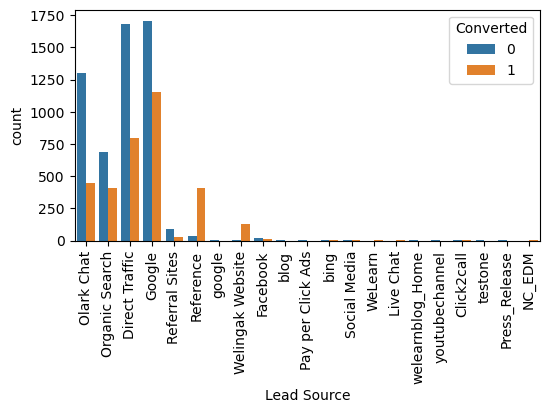

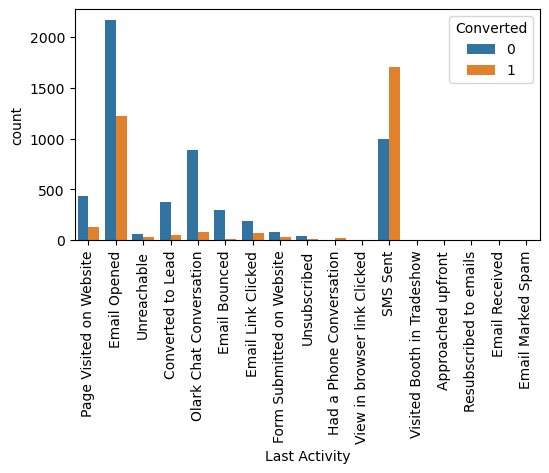

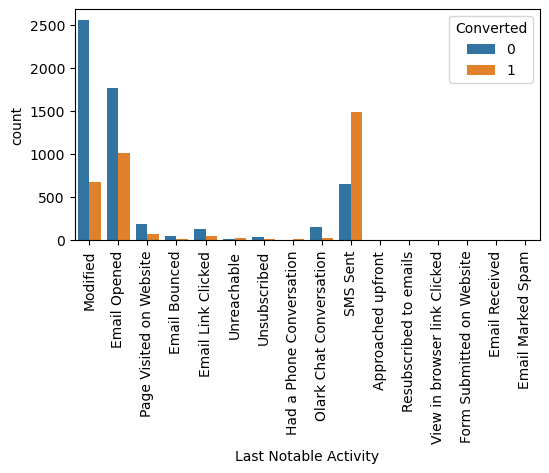

In [32]:
# Bivariate analysis between TARGET column and other categorical columns
lead_data['Converted'] = lead_data['Converted'].astype(str)

for i in cat_col:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=i, hue='Converted', data=lead_data)
    plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
    plt.legend(title='Converted')  # Ensure the legend has a title
    plt.show()


## Based  on above graphs and data, we can conclude that few data available in columns "Lead Origin", 'Lead Source", "Last Activity" and "Last Notable Activity" are not useful for our analysis

Lead Origin
Total 4 - 3 (Lead import - 0.3%)

Lead Source 
7 (remaining data percentage is 0.6%)

Last Activity
8 (remaining data % is 2.1%)

Last Notable Activity
6 (remaining data % is 1.77%)

In [33]:
lead_data = lead_data[~lead_data['Lead Source'].isin(['Facebook', 'bing','google', 'Click2call', 'Press_Release', 'Social Media', 'Live Chat',
                                                     'youtubechannel', 'testone', 'Pay per Click Ads', 'welearnblog_Home',
                                                     'WeLearn','blog', 'NC_EDM'])]

In [34]:
lead_data = lead_data[~lead_data['Last Activity'].isin(['Unreachable', 'Unsubscribed', 'Had a Phone Conversation', 'Email Received',
                                                       'View in browser link Clicked', 'Approached upfront', 'Email Marked Spam',
                                                       'Visited Booth in Tradeshow', 'Resubscribed to emails'])]

In [35]:
lead_data = lead_data[~lead_data['Last Notable Activity'].isin(['Email Bounced', 'Unsubscribed', 'Unreachable', 'Email Received',
                                                               'Had a Phone Conversation', 'Email Marked Spam', 'Approached upfront',
                                                               'Resubscribed to emails', 'View in browser link Clicked','Form Submitted on Website'])]

In [36]:
lead_data = lead_data[~lead_data['Lead Origin'].isin(['Lead Import'])]

In [37]:
lead_data['Converted'] = lead_data['Converted'].astype(int)

lead_data[['Converted', 'Do Not Email','TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit','A free copy of Mastering The Interview']].corr(method='pearson', min_periods=1, numeric_only=False)

,Converted,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
Converted,1.000000,-0.125928,0.047454,0.353701,-0.000909,-0.033646
Do Not Email,-0.125928,1.000000,-0.022212,-0.051610,0.014016,0.050495
TotalVisits,0.047454,-0.022212,1.000000,0.357472,0.768986,0.284412
Total Time Spent on Website,0.353701,-0.051610,0.357472,1.000000,0.342935,0.179525
Page Views Per Visit,-0.000909,0.014016,0.768986,0.342935,1.000000,0.281693
A free copy of Mastering The Interview,-0.033646,0.050495,0.284412,0.179525,0.281693,1.000000


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [38]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
lead_data = pd.concat([lead_data, dummy1], axis=1)

In [40]:
# We have created dummies for the below variables, so we can drop them
lead_data = lead_data.drop(['Lead Origin','Lead Source', 'Last Activity', 'Last Notable Activity'], axis = 1)

In [41]:
lead_data.shape

(8624, 26)

In [42]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8624 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Do Not Email                                   8624 non-null   int64  
 1   Converted                                      8624 non-null   int32  
 2   TotalVisits                                    8624 non-null   float64
 3   Total Time Spent on Website                    8624 non-null   int64  
 4   Page Views Per Visit                           8624 non-null   float64
 5   A free copy of Mastering The Interview         8624 non-null   int64  
 6   Lead Origin_Landing Page Submission            8624 non-null   bool   
 7   Lead Origin_Lead Add Form                      8624 non-null   bool   
 8   Lead Source_Google                             8624 non-null   bool   
 9   Lead Source_Olark Chat                         8624 non-n

In [43]:
# Select boolean columns
bool_columns = lead_data.select_dtypes(include='bool').columns

# Convert boolean columns to integers
lead_data[bool_columns] = lead_data[bool_columns].astype(int)

In [44]:
lead_data.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,0,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
